In [34]:
# 1. Import thư viện
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
# 2. Load dữ liệu
df = pd.read_csv("final_features_full.csv")


In [36]:
# 5. Tách X (features) và y (label)
X = df.drop("label", axis=1)  # đổi 'label' thành tên cột mục tiêu của bạn
y = df["label"]


<h3>Chuẩn hóa dữ liệu (loại bỏ các cột đã encoded) và tách tập train, test</h3>

In [38]:
# Chuẩn hóa các cột số, không chuẩn hóa các cột đã encoded trong bước tiền xử lý
columns_to_scale = [
    'raised_amount_usd', 'funding_total_usd', 'raised_amount_m', 'raised_amount_b',
    'raised_amount_k', 'num_investors', 'success_rate', 'failure_rate', 'success_amount',
    'fail_amount', 'total_amount', 'avg_funding_per_investor', 'num_of_success_companies',
    'num_of_failed_companies', 'funded_at_year', 'funded_at_month', 'funded_at_day',
    'funding_total_m', 'funding_total_b', 'funding_total_k', 'company_age', 'funding_duration_days',
    'avg_funding_duration_per_round', 'funding_duration_months', 'funding_duration_years',
    'founded_at_year', 'founded_at_month', 'founded_at_day', 'first_funding_year',
    'first_funding_month', 'first_funding_day', 'last_funding_year', 'last_funding_month',
    'last_funding_day', 'top_past_sector', 'top_current_sector', 'top_future_sector', 'funding_frequency'
]
scaler = StandardScaler()
X_scaled_part = pd.DataFrame(scaler.fit_transform(X[columns_to_scale]), columns=columns_to_scale)
X_remaining = X.drop(columns=columns_to_scale)
X_final = pd.concat([X_scaled_part.reset_index(drop=True), X_remaining.reset_index(drop=True)], axis=1)

# Tách tập train/test
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)


In [39]:
model_names = []
accuracies = []
f1_scores = []
auc_scores = []

<H2>1. DECISION TREE</H2>

Decision Tree Accuracy: 0.8902513795217658
Decision Tree AUC Score: 0.8288

Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.73      0.72       959
         1.0       0.93      0.93      0.93      3934

    accuracy                           0.89      4893
   macro avg       0.83      0.83      0.83      4893
weighted avg       0.89      0.89      0.89      4893



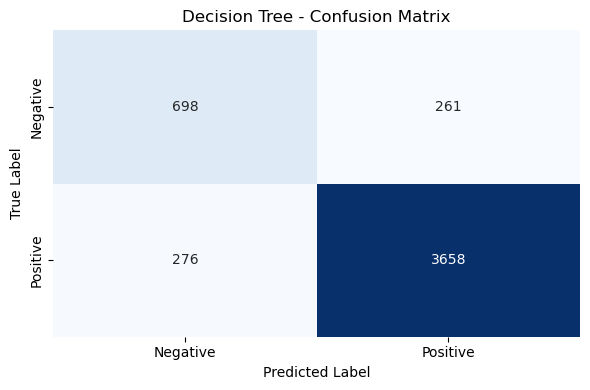

In [41]:
# 1. Khởi tạo mô hình DecisionTree
dt_model = DecisionTreeClassifier()

# 2. Huấn luyện mô hình với tập train
dt_model.fit(X_train, y_train)

# 3. Dự đoán trên tập test
y_pred_dt = dt_model.predict(X_test)

# 4. Dự đoán xác suất để tính AUC (chỉ dùng lớp 1)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# 4. Đánh giá mô hình
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
auc_dt = roc_auc_score(y_test, y_proba_dt)

# 5. Lưu kết quả vào danh sách
model_names.append("DT")
accuracies.append(accuracy_dt)
f1_scores.append(f1_dt)
auc_scores.append(auc_dt)

print("Decision Tree Accuracy:", accuracy_dt)
print(f"Decision Tree AUC Score: {auc_dt:.4f}")

# In classification report để đánh giá chi tiết hơn
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))


# Tính ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred_dt)

# Vẽ biểu đồ nhiệt
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree - Confusion Matrix')
plt.tight_layout()
plt.show()

<h2>2. XGBOOST</h2>

XGBoost Accuracy: 0.9223380339260168
XGBoost AUC Score: 0.9634

XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.72      0.78       959
         1.0       0.93      0.97      0.95      3934

    accuracy                           0.92      4893
   macro avg       0.90      0.84      0.87      4893
weighted avg       0.92      0.92      0.92      4893



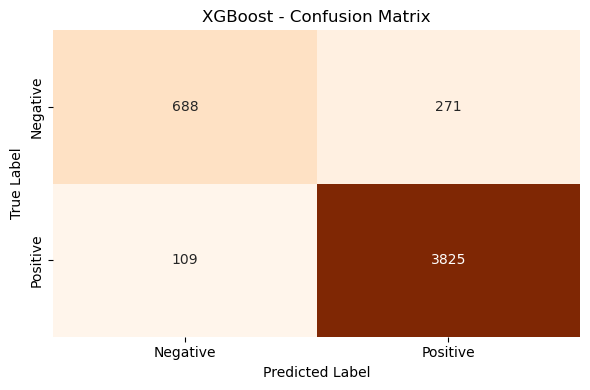

In [43]:
# 1. Khởi tạo mô hình XGBoost
xgb_model = xgb.XGBClassifier()

# 2. Huấn luyện mô hình với tập train
xgb_model.fit(X_train, y_train)

# 3. Dự đoán trên tập test
y_pred_xgb = xgb_model.predict(X_test)

# 4. Dự đoán xác suất để tính AUC (chỉ dùng lớp 1)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]



# 4. Đánh giá mô hình
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_proba_xgb)


# 5. Lưu kết quả vào danh sách
model_names.append("XGBoost")
accuracies.append(accuracy_xgb)
f1_scores.append(f1_xgb)
auc_scores.append(auc_xgb)

print("XGBoost Accuracy:", accuracy_xgb)
print(f"XGBoost AUC Score: {auc_xgb:.4f}")

# In classification report để đánh giá chi tiết hơn
print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Tính ma trận nhầm lẫn cho XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Vẽ heatmap với cmap cam (Oranges)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('XGBoost - Confusion Matrix')
plt.tight_layout()
plt.show()

<H2>3. ADABOOST</H2>

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.82689556509299
Adaboost AUC Score: 0.8102

AdaBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.62      0.30      0.40       959
         1.0       0.85      0.96      0.90      3934

    accuracy                           0.83      4893
   macro avg       0.73      0.63      0.65      4893
weighted avg       0.80      0.83      0.80      4893



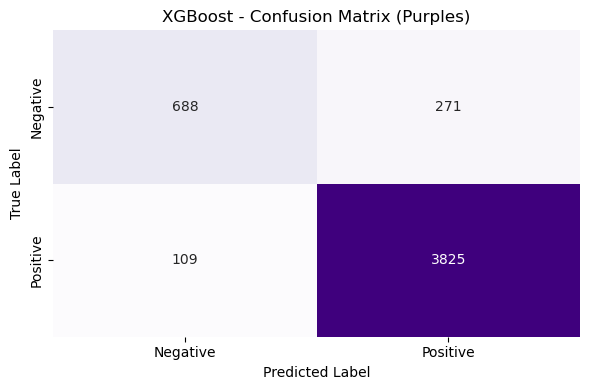

In [45]:
# 1. Khởi tạo mô hình AdaBoost
adaboost_model = AdaBoostClassifier()

# 2. Huấn luyện mô hình với tập train
adaboost_model.fit(X_train, y_train)

# 3. Dự đoán trên tập test
y_pred_adaboost = adaboost_model.predict(X_test)

# 4. Dự đoán xác suất để tính AUC (chỉ dùng lớp 1)
y_proba_adaboost = adaboost_model.predict_proba(X_test)[:, 1]


# 4. Đánh giá mô hình
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
f1_adaboost = f1_score(y_test, y_pred_adaboost)
auc_adaboost = roc_auc_score(y_test, y_proba_adaboost)



# 5. Lưu kết quả vào danh sách
model_names.append("AdaBoost")
accuracies.append(accuracy_adaboost)
f1_scores.append(f1_adaboost)
auc_scores.append(auc_adaboost)


# In classification report để đánh giá chi tiết hơn
print("AdaBoost Accuracy:", accuracy_adaboost)
print(f"Adaboost AUC Score: {auc_adaboost:.4f}")
print("\nAdaBoost Classification Report:\n", classification_report(y_test, y_pred_adaboost))


# Tính ma trận nhầm lẫn cho XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Vẽ heatmap với cmap tím (Purples)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Purples', cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('XGBoost - Confusion Matrix (Purples)')
plt.tight_layout()
plt.show()

<h2>4. RANDOM FOREST 100</h2>

RandomForest (100 trees) Accuracy: 0.9378704271408134
Random Forest (100 trees) AUC Score: 0.9818

RandomForest (100 trees) Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.75      0.83       959
         1.0       0.94      0.98      0.96      3934

    accuracy                           0.94      4893
   macro avg       0.93      0.87      0.89      4893
weighted avg       0.94      0.94      0.94      4893



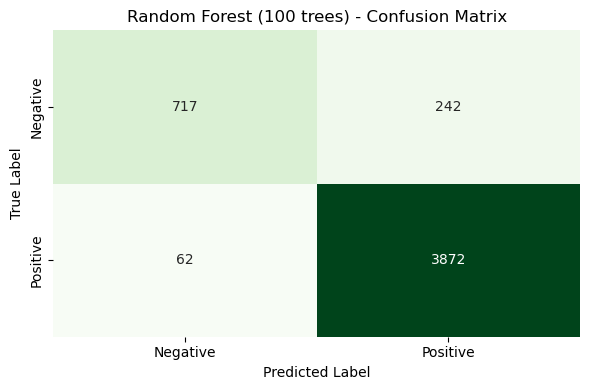

In [47]:
# 1. Khởi tạo mô hình RandomForest với 100 cây
rf_model_100 = RandomForestClassifier(n_estimators=100)

# 2. Huấn luyện mô hình với tập train
rf_model_100.fit(X_train, y_train)

# 3. Dự đoán trên tập test
y_pred_rf_100 = rf_model_100.predict(X_test)

# 4. Dự đoán xác suất để tính AUC (chỉ dùng lớp 1)
y_proba_rf_100 = rf_model_100.predict_proba(X_test)[:, 1]

# 4. Đánh giá mô hình
accuracy_rf_100 = accuracy_score(y_test, y_pred_rf_100)
f1_rf_100 = f1_score(y_test, y_pred_rf_100)
auc_rf_100 = roc_auc_score(y_test, y_proba_rf_100)



# 5. Lưu kết quả vào danh sách
model_names.append("RF100")
accuracies.append(accuracy_rf_100)
f1_scores.append(f1_rf_100)
auc_scores.append(auc_rf_100)

print("RandomForest (100 trees) Accuracy:", accuracy_rf_100)
print(f"Random Forest (100 trees) AUC Score: {auc_rf_100:.4f}")

# In classification report để đánh giá chi tiết hơn
print("\nRandomForest (100 trees) Classification Report:\n", classification_report(y_test, y_pred_rf_100))

# Tính ma trận nhầm lẫn cho Random Forest
cm_rf_100 = confusion_matrix(y_test, y_pred_rf_100)

# Vẽ heatmap với cmap xanh lá (Greens)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf_100, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest (100 trees) - Confusion Matrix')
plt.tight_layout()
plt.show()

<H2>5. RANDOM FOREST 200</H2>

RandomForest (200 trees) Accuracy: 0.9405272838749233
Random Forest (200 trees) AUC Score: 0.9828

RandomForest (200 trees) Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.75      0.83       959
         1.0       0.94      0.99      0.96      3934

    accuracy                           0.94      4893
   macro avg       0.94      0.87      0.90      4893
weighted avg       0.94      0.94      0.94      4893



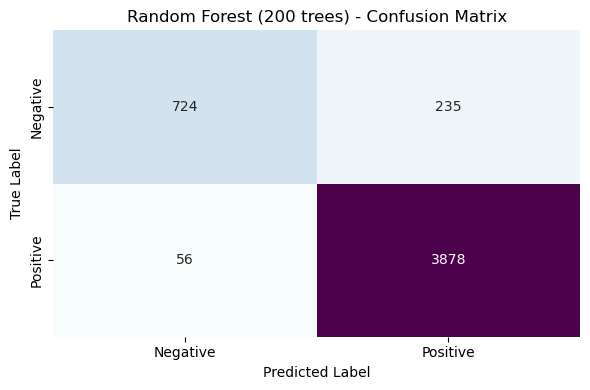

In [49]:
# 1. Khởi tạo mô hình RandomForest với 200 cây
rf_model_200 = RandomForestClassifier(n_estimators=200)

# 2. Huấn luyện mô hình với tập train
rf_model_200.fit(X_train, y_train)

# 3. Dự đoán trên tập test
y_pred_rf_200 = rf_model_200.predict(X_test)

# 4. Dự đoán xác suất để tính AUC (chỉ dùng lớp 1)
y_proba_rf_200 = rf_model_200.predict_proba(X_test)[:, 1]

# 4. Đánh giá mô hình
accuracy_rf_200 = accuracy_score(y_test, y_pred_rf_200)
f1_rf_200 = f1_score(y_test, y_pred_rf_200)
auc_rf_200 = roc_auc_score(y_test, y_proba_rf_200)



# 5. Lưu kết quả vào danh sách
model_names.append("RF200")
accuracies.append(accuracy_rf_200)
f1_scores.append(f1_rf_200)
auc_scores.append(auc_rf_200)


print("RandomForest (200 trees) Accuracy:", accuracy_rf_200)
print(f"Random Forest (200 trees) AUC Score: {auc_rf_200:.4f}")

# In classification report để đánh giá chi tiết hơn
print("\nRandomForest (200 trees) Classification Report:\n", classification_report(y_test, y_pred_rf_200))

# Tính ma trận nhầm lẫn cho Random Forest (200 cây)
cm_rf_200 = confusion_matrix(y_test, y_pred_rf_200)

# Vẽ heatmap với cmap tím nhạt (BuPu)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf_200, annot=True, fmt='d', cmap='BuPu', cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest (200 trees) - Confusion Matrix')
plt.tight_layout()
plt.show()

<H2>6. KNN</H2>

KNN Accuracy: 0.8902513795217658
KNN AUC Score: 0.9191

KNN Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.68      0.71       959
         1.0       0.92      0.94      0.93      3934

    accuracy                           0.89      4893
   macro avg       0.83      0.81      0.82      4893
weighted avg       0.89      0.89      0.89      4893



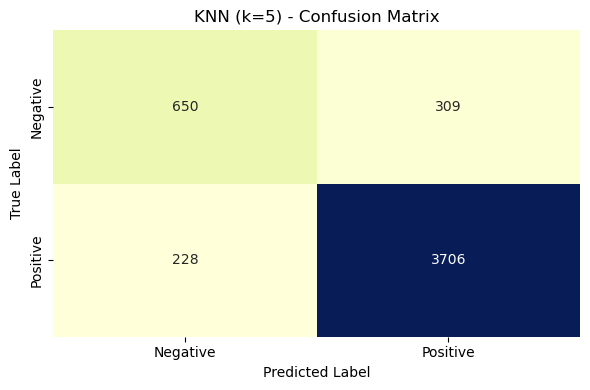

In [51]:
# 1. Khởi tạo mô hình KNN (số lượng hàng xóm = 5)
knn_model = KNeighborsClassifier(n_neighbors=5)

# 2. Huấn luyện mô hình với tập train
knn_model.fit(X_train, y_train)

# 3. Dự đoán trên tập test
y_pred_knn = knn_model.predict(X_test)

# 4. Dự đoán xác suất để tính AUC (chỉ dùng lớp 1)
y_proba_knn = knn_model.predict_proba(X_test)[:, 1]

# 4. Đánh giá mô hình
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, y_proba_knn)


# 5. Lưu kết quả vào danh sách
model_names.append("KNN")
accuracies.append(accuracy_knn)
f1_scores.append(f1_knn)
auc_scores.append(auc_knn)

print("KNN Accuracy:", accuracy_knn)
print(f"KNN AUC Score: {auc_knn:.4f}")

# In classification report
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))

# Tính ma trận nhầm lẫn cho KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Vẽ heatmap với cmap vàng-xanh (YlGnBu)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='YlGnBu', cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('KNN (k=5) - Confusion Matrix')
plt.tight_layout()
plt.show()

<h2>Tổng kết</h2>

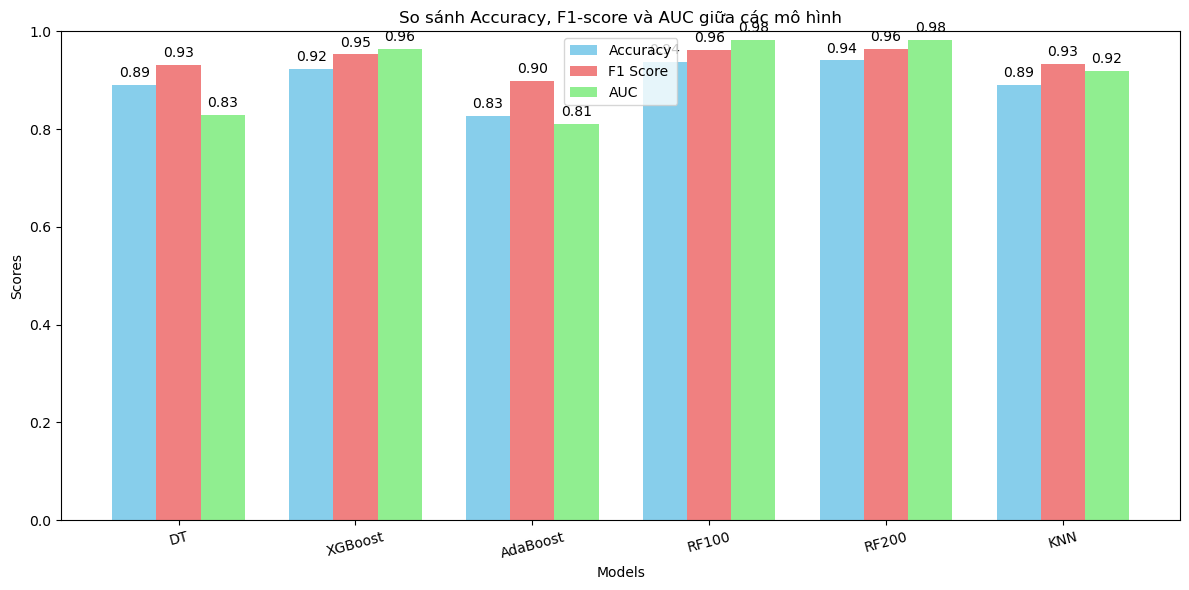

In [53]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(model_names))  # vị trí các mô hình
width = 0.25  # thu hẹp độ rộng để vừa 3 cột

fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - width, accuracies, width, label='Accuracy', color='skyblue')
bars2 = ax.bar(x, f1_scores, width, label='F1 Score', color='lightcoral')
bars3 = ax.bar(x + width, auc_scores, width, label='AUC', color='lightgreen')

# Gán nhãn trục và tiêu đề
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('So sánh Accuracy, F1-score và AUC giữa các mô hình')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=15)
ax.legend()
ax.set_ylim(0, 1)

# Ghi số lên đầu cột
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
